In [2]:
#Analyzing data from Uber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar

In [4]:
data = pd.read_csv('C:/Users/USER/Desktop/Uber Drives - .csv')

In [5]:
data.head()     #Python representing any missing number as NaN

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
data.isnull()      #anyone without datapoints it will output True below

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [7]:
data.isnull().any()   #.any here means let python check every of the column ad if any has no values let it output True

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [8]:
data.isnull().sum()   #.sum mens sum up all missing vales in each column

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [9]:
data = data.dropna()     #we want to drop all the NaN values

In [12]:
data.isnull().sum()    #we don't have any missing values

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [13]:
data.dtypes     #python won't recognize all of those start_date, End_date as date but as object

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [17]:
#we want python to recognize it as date not as object so we want convert it to the right format so as python will recognize it as date and not object
data['START_DATE'] = pd.to_datetime(data['START_DATE*'], format ='%m/%d/%Y %H:%M')   #percentage m is the month,d the following is the day, Y following is the year, H and M is the hour and minutes      #This is why we imported datetime function above
data['END_DATE'] = pd.to_datetime(data['END_DATE*'], format ='%m/%d/%Y %H:%M')       #when we're done we first run it to check if everything is fine

In [18]:
data.dtypes    # .dtypes means display the type of each column.  we now see below the one we converted is not an object but datetime64

START_DATE*            object
END_DATE*              object
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
START_DATE     datetime64[ns]
END_DATE       datetime64[ns]
dtype: object

In [23]:
hour = []                          #we're defining hour as a list earlier (e.g. hour = []), same as the rest till weekday 
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE']:      #we have to use the START_DATE without asterisk that's converted because is a proper datetime so we can loop, because without using the converted (x is just a string like "1/1/2016 21:11".Strings don’t have .day, .month, or .hour attributes..).     
    hour.append(x.hour)      #we want to extract hour from each date and add it to the hour empty list above, remember  append means to add
    day.append(x.day)              #we want to extract day from each date and add it to the day empty list above
    dayofweek.append(x.dayofweek)            #without .append here also we can't call this list 
    month.append(x.month)            #we want to extract month from each date and add it to the month empty list above
    weekday.append(calendar.day_name[dayofweek[-1]])          #we will use the calender we imported to get the weekday #we want to extract weekday from each date and add it to the weekday empty list above. we are extracting dayofweek from the calender that's why we put it in the square brackets 

data['HOUR'] = hour                 #the data here is our data variable name we assigned our uber_drives dataset to. and we are taking or extracting those hour, day , e.t.v to our list above
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['month']  = month
data['WEEKDAY'] = weekday

In [24]:
data.head()                   #we see the new data we extracted as columns below which are HOUR, DAY, DAY OF WEEK, Month, WEEKDAY

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE,HOUR,DAY,DAY OF WEEK,month,WEEKDAY
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,21,1,4,1,Friday
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,20,2,5,1,Saturday
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,17,5,1,1,Tuesday
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,14,6,2,1,Wednesday
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,17,6,2,1,Wednesday


In [25]:
#Let's check the various categories that we have in data column name as CATEGORY and count them using the value_count function
data['CATEGORY*'].value_counts()             #if we see below most people prefer to use uber as business than booking personal

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

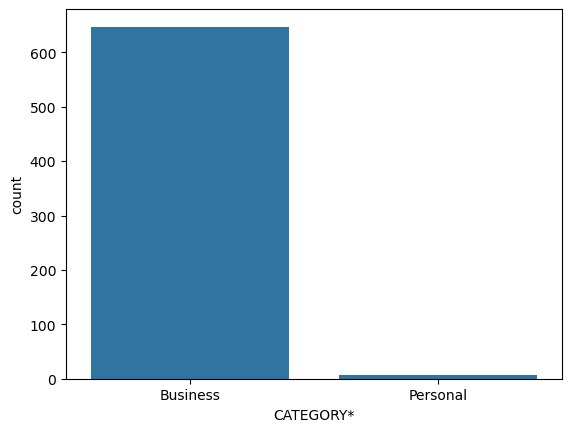

In [26]:
#let's visualize the above category column using countplot in Seaborn cause it makes it more visualing appealing
sns.countplot(x='CATEGORY*', data =data)  # in the first data you're telling seaborn that where they can see the category is your dataset that's stored as data    #countplot is another plot function in seaborn
#In the countplot below :Business here means most people prefer booking uber for certain destination than the personal which means hiring it for a day or two 

<Axes: ylabel='Frequency'>

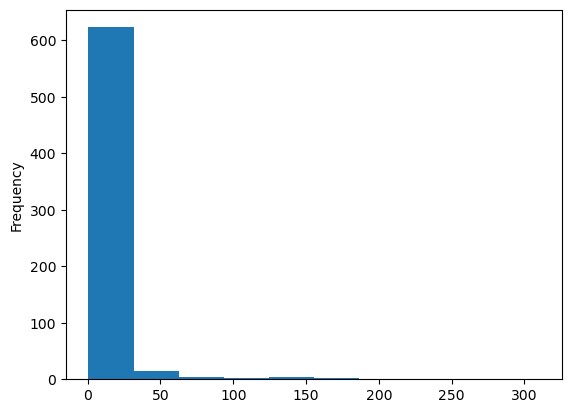

In [30]:
#HOW LONG DO people travel  
data['MILES*'].plot.hist()          #.hist here means display in histogram format
#The interpretation from from the plot we see  below is that most people travel for short distance for 1-50 miles(because you can book uber from 0 miles) with uber than 0-250 0r 300 miles

Text(0.5, 1.0, 'Number of Trips Vs Hours')

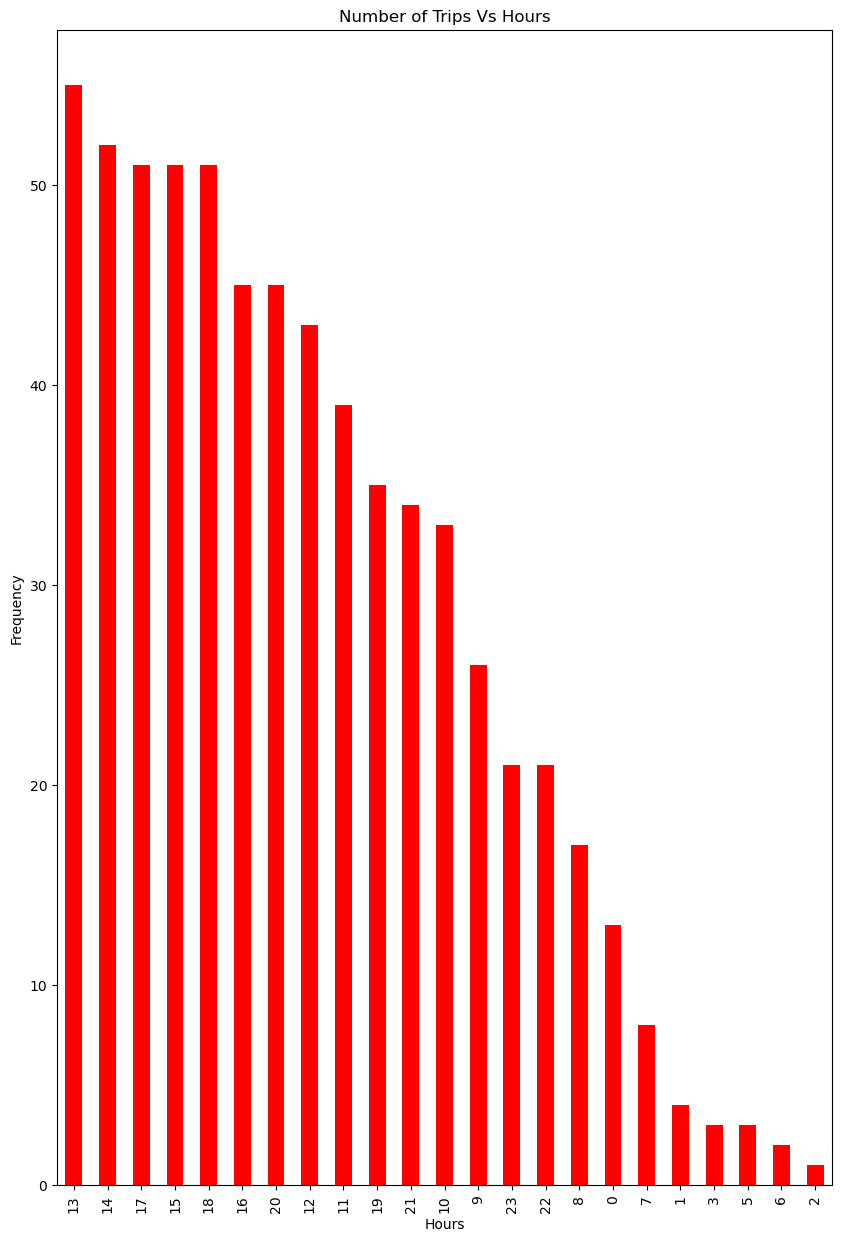

In [31]:
#What Hour Do Most PEOPLE Take UBER To Their Destination whether in the morning, afternoon or evening
hours = data['START_DATE'].dt.hour.value_counts()     #dt here is datetime
#we just don't want to get the hours but we want it to be displayed visually in a bar plot that's why we set the kind below to bar, and the figsize (i.e how wide and tall we want oour plot to be)  
hours.plot(kind ='bar',color = 'red', figsize=(10,15))    #the red is the color e want the bar plot to be displayed

plt.xlabel('Hours')             #title under the xlabel
plt.ylabel('Frequency')       #i.e how frequently people book the uber
plt.title('Number of Trips Vs Hours')

#we see below that most people book uber around the hours of 13, 14, 18, 17, 15 which are 1pm,2pm for hour 14 e.t.c as against 2am, 3am, 5am e.t.c in the night  

<Axes: xlabel='PURPOSE*'>

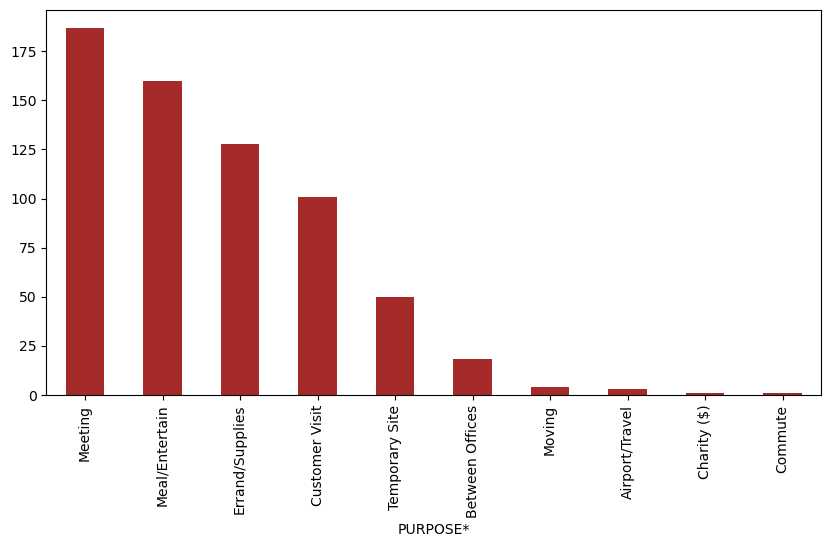

In [35]:
#Check The Purpose Of The TRip that people embark on and display it using barplot
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')
#we see below that most people embark on meetings, meal/elevation, Errand/Supplies, customer visit, temporary sites and can give them discount on the trip they book most

<Axes: xlabel='WEEKDAY'>

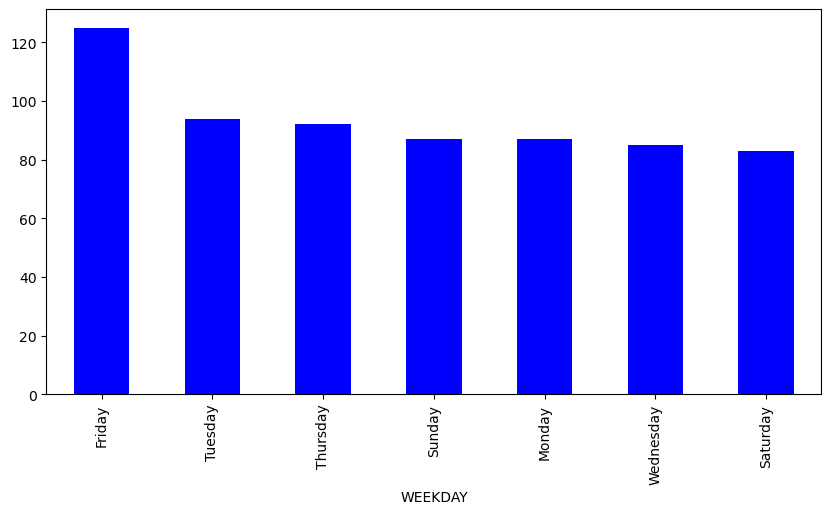

In [37]:
#WHICH DAY HAS THE HIGHEST NUMBER OF TRIPs and we are using the weekday we extract using for loop above
data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
#The interpretation says most people book uber alot on friday, this helps us draw inference to which day we should do most advertisement alot, give out coupons and discounts for people to book more

<Axes: xlabel='DAY'>

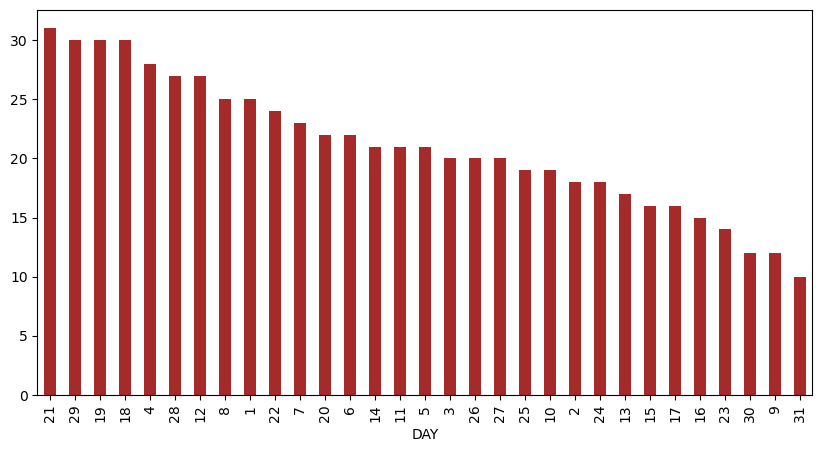

In [38]:
 #WHAT ARE THE NUMBER OF TRIPS PER EACH DAY
data['DAY'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')
#from below we see the days in the month like 21st day people book the most followed by 29,18,19, e.t.c

<Axes: xlabel='month'>

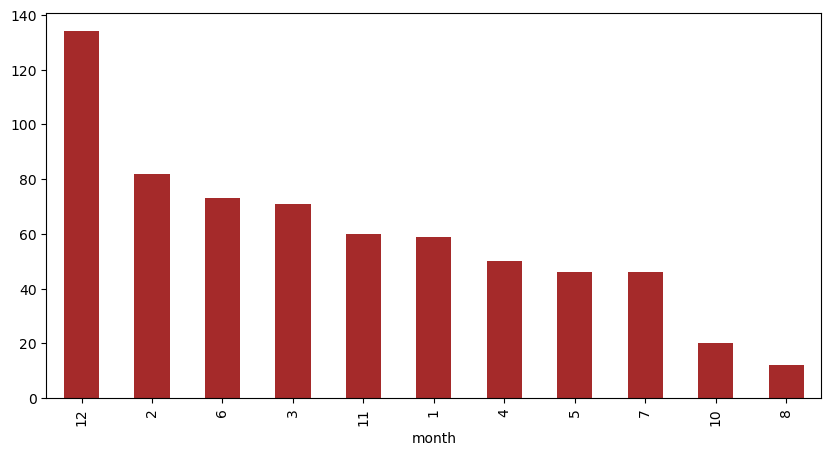

In [40]:
#what are the various trips people embark on in the MONTH
data['month'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')
#We see below that in the 12 month which december people book alot of uber than the 2nd month e.t.c, so we know which month we earn more profits and our revenues is going to increase. 8th month is the least month people book

<Axes: xlabel='START*'>

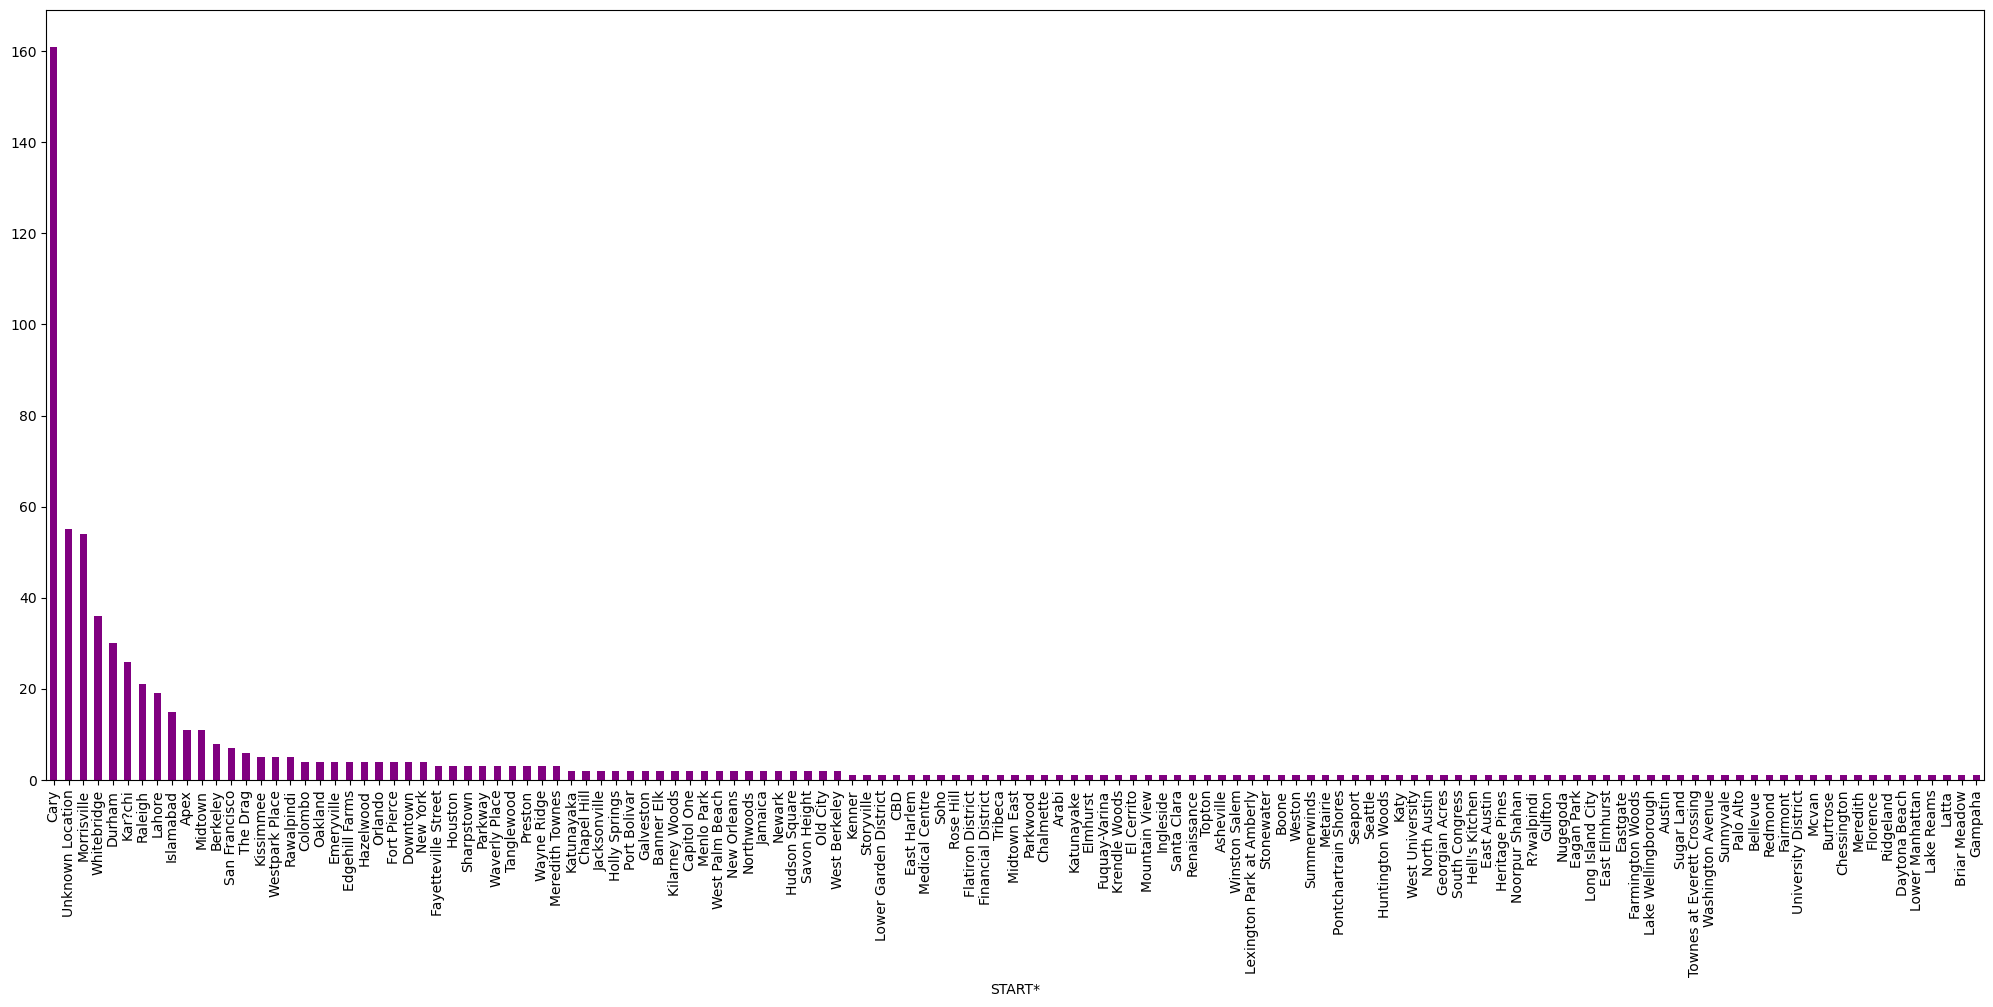

In [43]:
#The Starting Point of the Trips :i.e Where Do People Start Boarding Thier Trip FRom Most?
data['START*'].value_counts().plot(kind='bar', figsize=(25,10), color='purple')
#we see that most people order uber from  Cary destination, followed by Morrisville, WhiteBridge.